# Python Assignment 2

## Transforming like a data transformer:

## Importing the important libraries:

In [5]:
# Import all required libraries
# Data analysis and manipulation
import pandas as pd
# Working with arrays
import numpy as np
# Statistical visualization
import seaborn as sns
# Matlab plotting for Python
import matplotlib.pyplot as plt
# Data analysis
import statistics as stat
# Predictive data analysis: process data 
from sklearn import preprocessing as pproc
import scipy.stats as stats
# Visualizing missing values
import missingno as msno
# Statistical modeling
import statsmodels.api as sm

# Increase font size of all seaborn plot elements
sns.set(font_scale = 1.5, rc = {'figure.figsize':(8, 8)})

# Change theme to "white"
sns.set_style("white")

## Reading the csv file and loading the data:

In [6]:
# Read csv 
data = pd.read_csv("spam.csv")

# Create Age_group from the age column
def Spam_or_not_data(data): 
  if data.yesno == "y": return "Spam"
  else: return "Not a spam"

# Apply the function to data
data['Spam_or_not'] = data.apply(Spam_or_not_data, axis = 1)

# What does the data look like
data.head()

,crl.tot,dollar,bang,money,n000,make,yesno,Spam_or_not
0,278,0.000,0.778,0.00,0.00,0.00,y,Spam
1,1028,0.180,0.372,0.43,0.43,0.21,y,Spam
2,2259,0.184,0.276,0.06,1.16,0.06,y,Spam
3,191,0.000,0.137,0.00,0.00,0.00,y,Spam
4,191,0.000,0.135,0.00,0.00,0.00,y,Spam


## Data Normality
Normal distributions (bell curves) are a common data assumptions for many hypothesis testing statistics, in particular parametric statistics. Deviations from normality can either strongly skew the results or reduce the power to detect a significant statistical difference.

Here are the distribution properties to know and consider:

The mean, median, and mode are the same value.

Distribution symmetry at the mean.

Normal distributions can be described by the mean and standard deviation.

## Describing Properties of our Data (Refined)
Skewness
The symmetry of the distribution

In [10]:
# Make a copy of the data 
dataCopy = data.copy()

# Select only numerical columns
dataRed = dataCopy.select_dtypes(include = np.number)

# List of numerical columns 
dataRedColsList = dataRed.columns[...]

# For all values in the numerical column list from above
for i_col in dataRedColsList:
  # List of the values in i_col
  dataRed_i = dataRed.loc[:,i_col]
  
  # Skewness
  skewness = round((dataRed_i.skew()), 3) 
  
  # Kurtosis
  kurtosis = round((dataRed_i.kurt()), 3)
  
  # Print a blank row
  print('')
  
  # Print the column name
  print(i_col)
  
  # Print skewness and kurtosis
  print('skewness =', skewness, 'kurtosis =', kurtosis)


crl.tot
skewness = 8.71 kurtosis = 145.83

dollar
skewness = 11.163 kurtosis = 199.954

bang
skewness = 18.658 kurtosis = 607.456

money
skewness = 14.687 kurtosis = 302.056

n000
skewness = 5.714 kurtosis = 46.808

make
skewness = 5.676 kurtosis = 49.305


# Testing Normality:

## QQ Plot:

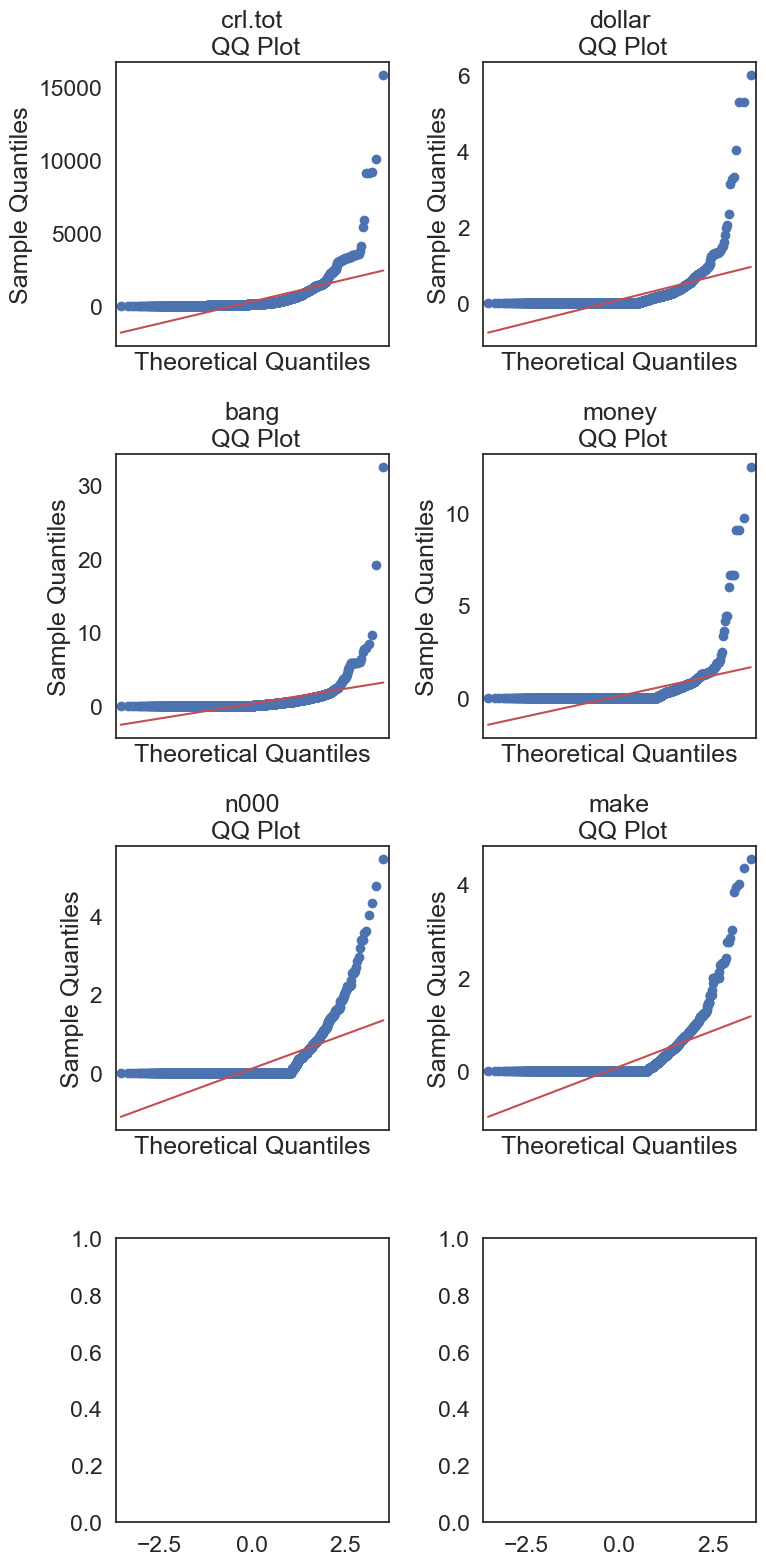

In [12]:
# Make a copy of the data 
dataCopy = data.copy()

# Remove NAs
dataCopyFin = dataCopy.dropna()

# Drop Outcome, binary columns are never normally distributed 
dataCopyFin1 = dataCopyFin.drop('Spam_or_not', axis = "columns")

# Select only numerical columns
dataRed = dataCopyFin1.select_dtypes(include = np.number)

# Combine multiple plots, the number of columns and rows is derived from the number of numerical columns from above. 
fig, axes = plt.subplots(ncols = 2, nrows = 4, sharex = True, figsize = (2 * 4, 4 * 4))

# Generate figures for all numerical grouped data subsets
for k, ax in zip(dataRed.columns, np.ravel(axes)):
    sm.qqplot(dataRed[k], line = 's', ax = ax)
    ax.set_title(f'{k}\n QQ Plot')
plt.tight_layout()
plt.show()

Crl.tot Q-Q Plot - right skewed, heavy tailed, can observe a spike in the values with a spread from around 5000 and gaps around 6000.\
Dollar Q-Q Plot - right skewed, heavy tailed, can observe a spike in the values with a spread from around 3.\
Bang Q-Q Plot - right skewed, heavy tailed, can observe a spike in the values with a gaps around 10.\
Money Q-Q Plot - right skewed, heavy tailed, can observe a spike in the values with a spread from around 3.\
n000 Q-Q Plot - right skewed, heavy tailed, can observe a sudden spike in the values with a spread from around 3.\
make Q-Q Plot - right skewed, heavy tailed, can observe a sudden spike in the values with a spread from around 3.

## Normality within subgroups:

## Looking within Bang at the subgroup normality:

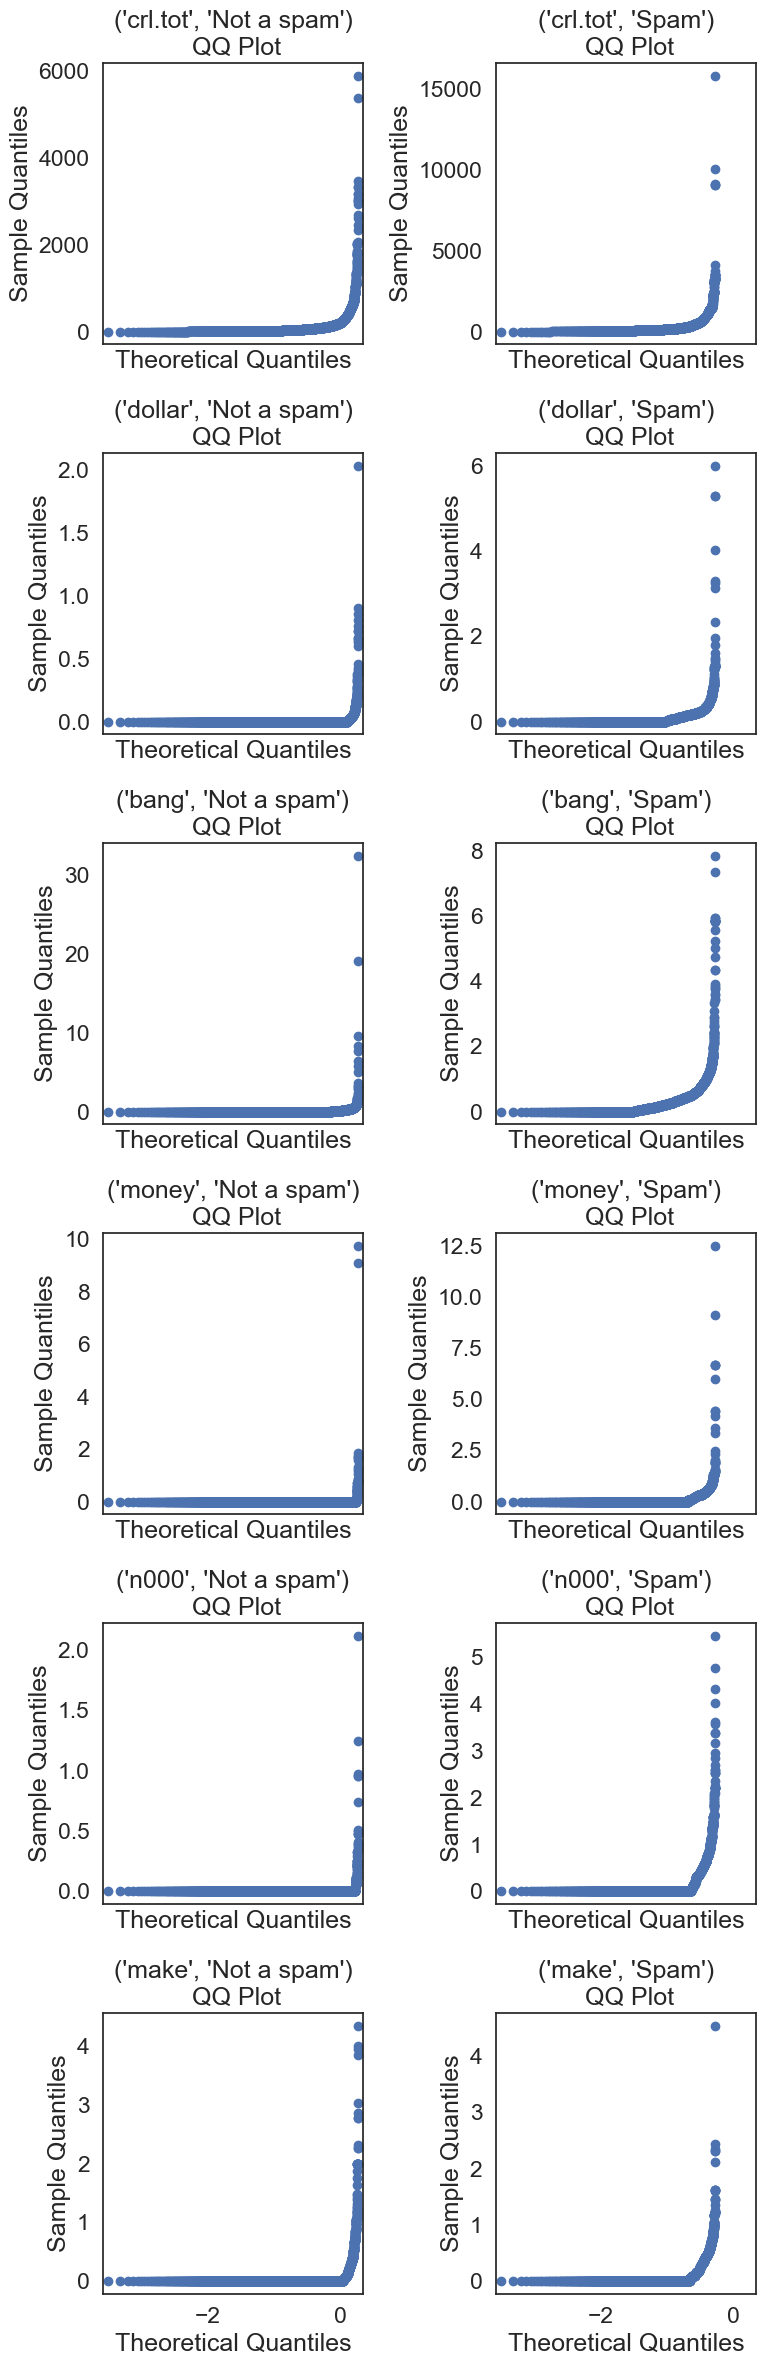

In [13]:
# Make a copy of the data 
dataCopy = data.copy()

# Remove NAs
dataCopyFin = dataCopy.dropna()

# Create a new column named in x, which is filled with the dataset rownames
dataCopyFin.index.name = 'Index'

# Reset the rownames index (not a column)
dataCopyFin.reset_index(inplace = True)

# Pivot the data from long-to-wide with pivot, using Date as the index, so that a column is created for each Group and numerical column subset
dataPivot = dataCopyFin.pivot(index = 'Index', columns = 'Spam_or_not', values = ['crl.tot', 'dollar', 'bang', 'money','n000','make'])

# Select only numerical columns
dataRed = dataPivot.select_dtypes(include = np.number)

# Combine multiple plots, the number of columns and rows is derived from the number of numerical columns from above. 
fig, axes = plt.subplots(ncols = 2, nrows = 6, sharex = True, figsize = (2 * 4, 6 * 4))

# Generate figures for all numerical grouped data subsets
for k, ax in zip(dataRed.columns, np.ravel(axes)):
    sm.qqplot(dataRed[k], line = 's', ax = ax)
    ax.set_title(f'{k}\n QQ Plot')
plt.tight_layout()
plt.show()

crl.tot not spam- right skewed, sudden rise and gap around 4000\
crl.tot spam- right skewed, sudden rise and gap after 5000\
dollar not spam- right skewed, sudden rise and big gap after 1\
dollar spam- right skewed and spread around 2\
bang not a spam- right skewed and gap around 10\
bang spam- right skewed and spread around 4\
money not a spam- right skewed, sudden rise and big gap after 2\
money spam- right skewed, spread around 2.5\
n000 not a spam- right skewed, sudden rise and big gap around 1.2\
n000 spam- right skewed, sudden rise and spread around 3\
make not a spam- right skewed, sudden rise and gap around 2.7

## Transforming data:

In [15]:
# Filter insulin greater than 0
Ins = data[data.bang > 0]

# Select only Insulin
InsMod = Ins.filter(["bang"], axis = "columns")

## Squared root tranformation:

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


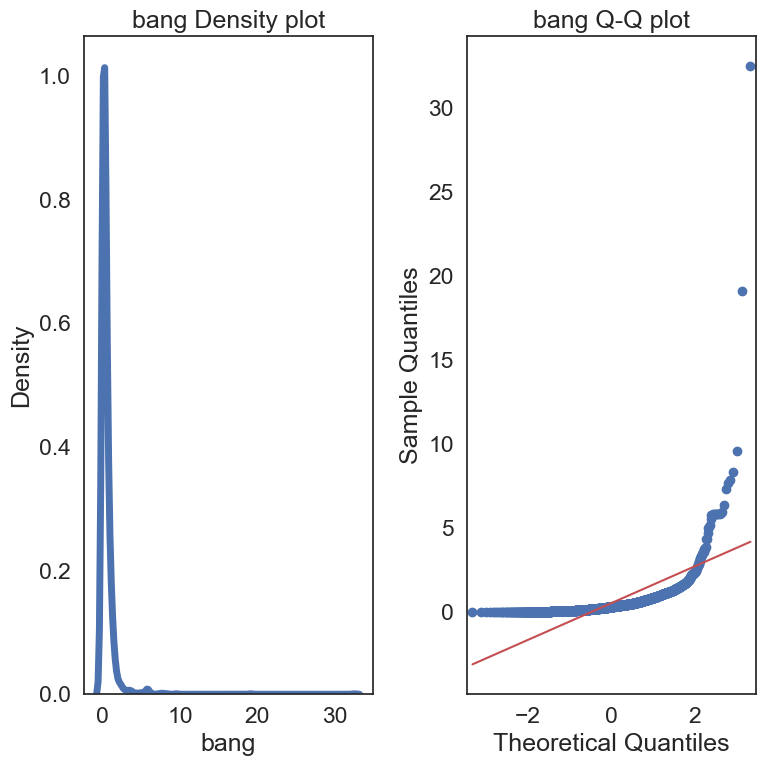

In [18]:
# Square-root transform the data in a new column
InsMod['Ins_Sqrt'] = np.sqrt(InsMod['bang'])

# Specify desired column
col = InsMod.bang

# Specify desired column
i_col = InsMod.Ins_Sqrt

# ORIGINAL
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('bang Density plot')    

# Q-Q plot
sm.qqplot(col, line='s', ax = ax2)
ax2.set_title('bang Q-Q plot')    
plt.tight_layout()
plt.show()

bang density plot - Right skewed\
bang Q-Q plot - Right skewed and gap around 10

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


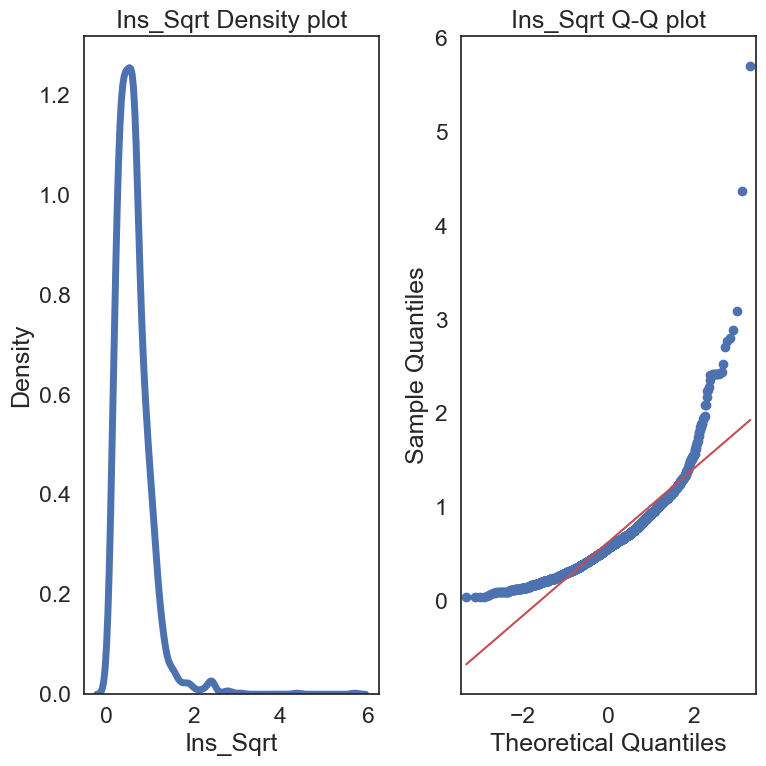

In [20]:
# TRANSFORMED
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Ins_Sqrt Density plot')   

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Ins_Sqrt Q-Q plot') 
plt.tight_layout()
plt.show()

Ins_Sqrt Density plot- Right skewed\
Ins_Sqrt Q-Q plot-Right skewed and gap around 3

## Logarithmic (+1) Transformation

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


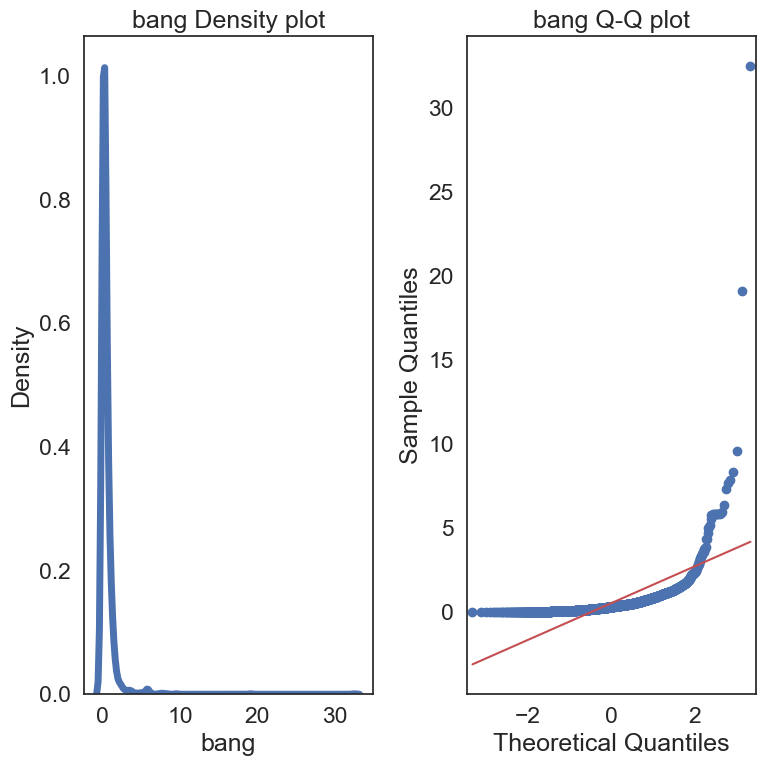

In [21]:
# Logarithmic transform the data in a new column
InsMod['Ins_Log'] = np.log(InsMod['bang'] + 1)

# Specify desired column
col = InsMod.bang

# Specify desired column
i_col = InsMod.Ins_Log

# ORIGINAL
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('bang Density plot')    

# Q-Q plot
sm.qqplot(col, line='s', ax = ax2)
ax2.set_title('bang Q-Q plot')    
plt.tight_layout()
plt.show()

bang Density plot- Right skewed\
bang Q-Q plot-Right skewed and gap around 10

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


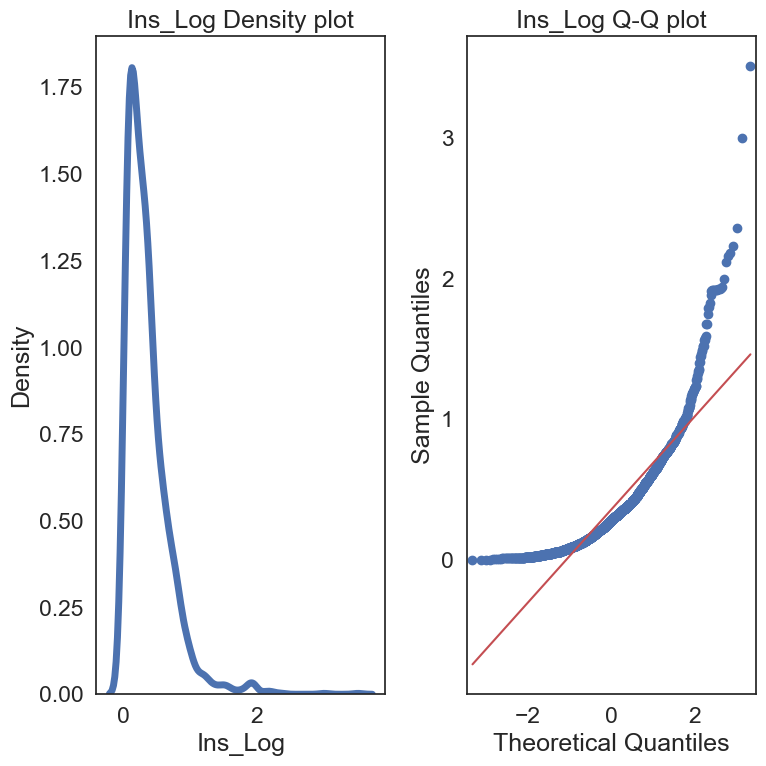

In [23]:
# TRANSFORMED
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Ins_Log Density plot')   

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Ins_Log Q-Q plot') 
plt.tight_layout()
plt.show()

Ins_log Density plot- Right skewed\
Ins_log Q-Q plot-Right skewed and gap around 2.2

## Inverse transformation:

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


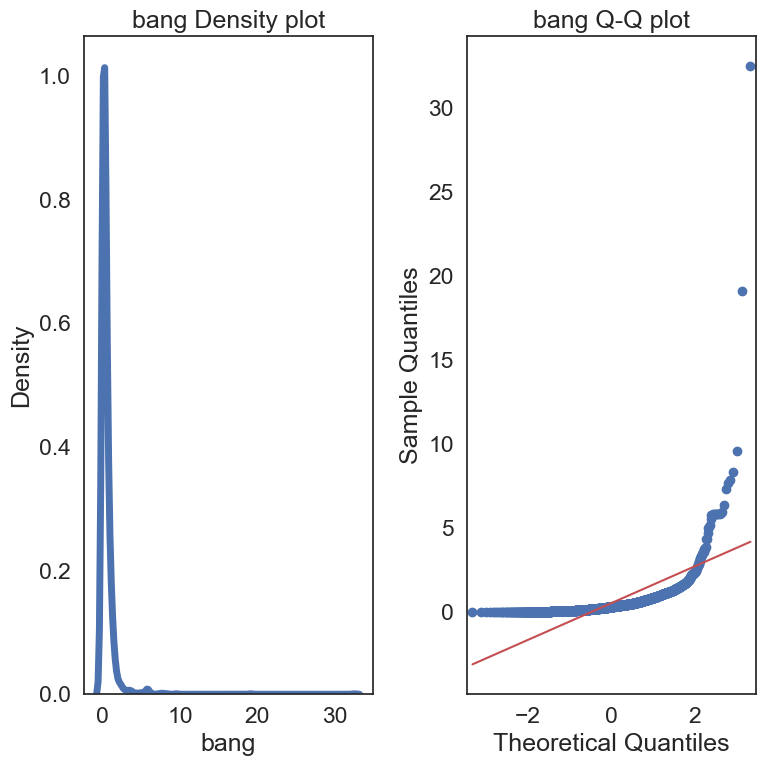

In [25]:
# Inverse transform the data in a new column
InsMod['Ins_Inv'] = 1/InsMod.bang

# Specify desired column
col = InsMod.bang

# Specify desired column
i_col = InsMod.Ins_Inv

# ORIGINAL
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('bang Density plot')    

# Q-Q plot
sm.qqplot(col, line='s', ax = ax2)
ax2.set_title('bang Q-Q plot')    
plt.tight_layout()
plt.show()

bang Density plot- Right skewed\
bang Q-Q plot-Right skewed and gap around 10

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


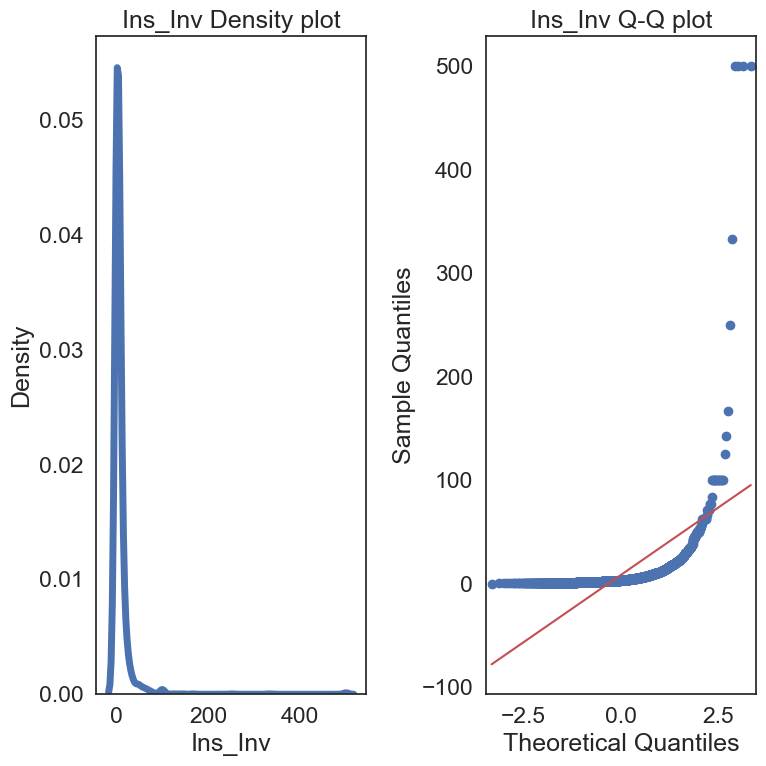

In [27]:
# TRANSFORMED
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Ins_Inv Density plot')   

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Ins_Inv Q-Q plot') 
plt.tight_layout()
plt.show()

## Box-cox Transformation:

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


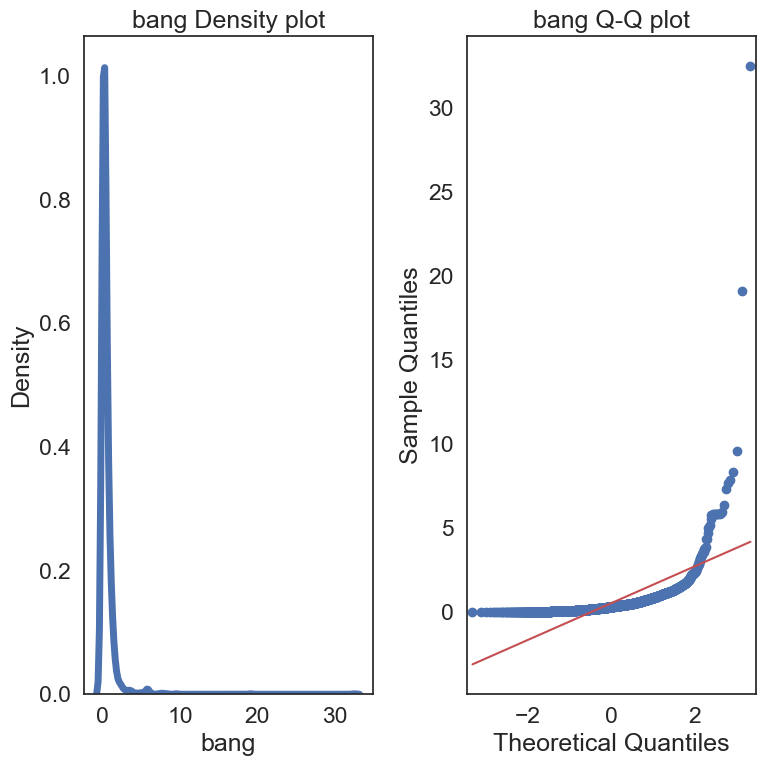

In [28]:
# Box-cox transform the data in a new column
InsMod['Ins_Boxcox'], parameters = stats.boxcox(InsMod['bang'])

# Specify desired column
col = InsMod.bang

# Specify desired column
i_col = InsMod.Ins_Boxcox

# ORIGINAL
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('bang Density plot')    

# Q-Q plot
sm.qqplot(col, line='s', ax = ax2)
ax2.set_title('bang Q-Q plot')    
plt.tight_layout()
plt.show()

C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Pranshu\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


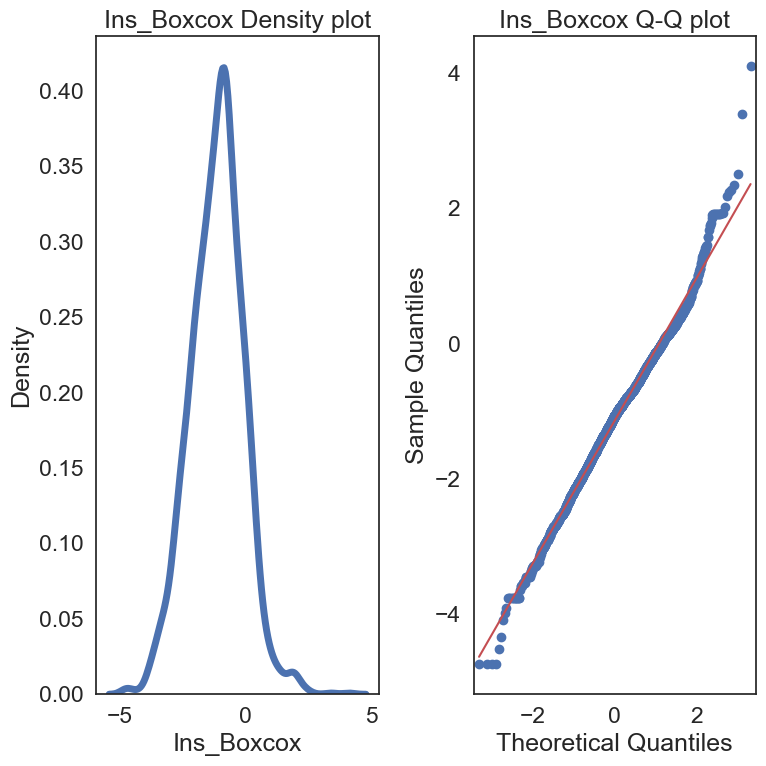

In [30]:
# TRANSFORMED
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Ins_Boxcox Density plot')   

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Ins_Boxcox Q-Q plot') 
plt.tight_layout()
plt.show()